# Linear Regression Project
## David Santiago Buitrago Prada
###5/9/2025

# Hypothesis

Partying and regular alcohol consumption impact the academic performance of students at Stellenbosch University. Through the Kaggle dataset 'Effects of Alcohol on Student Performance', the aim is to determine the impact of variables such as: classes missed, alcohol consumption, weekly partying frequency, study hours, cumulative GPA, among others, on the average GPA for the year 2023.

# Assumptions

'Partying Frequency', 'Drinks per Night Out', 'Classes Missed (Alcohol)', 'Modules Failed' negatively affect the average GPA.

The following variables positively affect the average GPA: 'Matric GPA', 'Study Hours', 'Parent Relationship Strength'

There is no multicollinearity among the independent variables.

In [ ]:
# 1. Instalar kagglehub (si no lo tienes)
!pip install kagglehub[pandas-datasets] --quiet

import kagglehub
import os
import pandas as pd

# 3. Descargar el dataset


# Download latest version
path = kagglehub.dataset_download("joshuanaude/effects-of-alcohol-on-student-performance")
print("Path to dataset files:", path)

# 4. Listar archivos descargados
print("Archivos en el dataset:", os.listdir(path))

# 5. Detectar el primer archivo CSV automáticamente
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
if len(csv_files) == 0:
    raise ValueError("No se encontró ningún archivo CSV en el dataset")

csv_path = os.path.join(path, csv_files[0])
print("Usando el archivo:", csv_path)

# 6. Cargar en un DataFrame
df = pd.read_csv(csv_path)
df.head()


100%|██████████| 8.58k/8.58k [00:00<00:00, 14.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joshuanaude/effects-of-alcohol-on-student-performance/versions/1
Archivos en el dataset: ['Stats survey.csv']
Usando el archivo: /root/.cache/kagglehub/datasets/joshuanaude/effects-of-alcohol-on-student-performance/versions/1/Stats survey.csv


,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [ ]:
df.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


In [ ]:
df_cualitative = df[['Your Sex?',
                    'What year were you in last year (2023) ?',
                    'What faculty does your degree fall under?',
                    'Your Accommodation Status Last Year (2023)',
                    'Monthly Allowance in 2023',
                    'Were you on scholarship/bursary in 2023?',
                     'Are you currently in a romantic relationship?',
                     'Do your parents approve alcohol consumption?',
                     'How strong is your relationship with your parent/s?']].copy()

In [ ]:
df_cuantitative = df[df.columns.difference(df_cualitative.columns)].drop(columns=['Timestamp']).copy()
df_cuantitative.head()

,Additional amount of studying (in hrs) per week,"How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?",Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Matric (grade 12) Average/ GPA (in %)
0,8+,3,0,Only weekends,8+,72.0,76.0
1,8+,4+,0,Only weekends,3-5,75.0,89.0
2,3-5,3,0,2,8+,55.0,76.0
3,3-5,2,0,3,8+,84.0,89.0
4,3-5,1,3,Only weekends,5-8,52.0,74.0


# Preprocessing
Transform interval variables to numerical types in `df_cuantitative`. Handle null values.


### Object Mapping:
Categorical or interval variables to quantitative values.


In [ ]:
# Create a mapping of current column names to shortened names
shortened_names = {
    'Timestamp': 'Timestamp',
    'Your Sex?': 'Sex',
    'Your Matric (grade 12) Average/ GPA (in %)': 'Matric GPA',
    'What year were you in last year (2023) ?': 'Year 2023',
    'What faculty does your degree fall under?': 'Faculty',
    'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)': 'Year 2023 GPA',
    'Your Accommodation Status Last Year (2023)': 'Accommodation 2023',
    'Monthly Allowance in 2023': 'Monthly Allowance 2023',
    'Were you on scholarship/bursary in 2023?': 'Scholarship 2023',
    'Additional amount of studying (in hrs) per week': 'Study Hours',
    'How often do you go out partying/socialising during the week? ': 'Partying Frequency',
    'On a night out, how many alcoholic drinks do you consume?': 'Drinks per Night Out',
    'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)': 'Classes Missed (Alcohol)',
    'How many modules have you failed thus far into your studies?': 'Modules Failed',
    'Are you currently in a romantic relationship?': 'In Relationship',
    'Do your parents approve alcohol consumption?': 'Parents Approve Alcohol',
    'How strong is your relationship with your parent/s?': 'Parent Relationship Strength'
}

# Rename columns in both dataframes
df = df.rename(columns=shortened_names)
df_cuantitative = df_cuantitative.rename(columns=shortened_names)
df_cualitative = df_cualitative.rename(columns=shortened_names)

print("Column names in df after renaming:")
print(df.columns.tolist())

print("\nColumn names in df_cuantitative after renaming:")
print(df_cuantitative.columns.tolist())

Column names in df after renaming:
['Timestamp', 'Sex', 'Matric GPA', 'Year 2023', 'Faculty', 'Year 2023 GPA', 'Accommodation 2023', 'Monthly Allowance 2023', 'Scholarship 2023', 'Study Hours', 'Partying Frequency', 'Drinks per Night Out', 'Classes Missed (Alcohol)', 'Modules Failed', 'In Relationship', 'Parents Approve Alcohol', 'Parent Relationship Strength']

Column names in df_cuantitative after renaming:
['Study Hours', 'Classes Missed (Alcohol)', 'Modules Failed', 'Partying Frequency', 'Drinks per Night Out', 'Year 2023 GPA', 'Matric GPA']


In [ ]:
non_numeric_cols = df_cuantitative.select_dtypes(include='object').columns

for col in non_numeric_cols:
    print(f"Unique values for column '{col}':")
    print(df_cuantitative[col].unique())
    print("-" * 30)

Unique values for column 'Study Hours':
['8+' '3-5' '5-8' '1-3' '0' nan]
------------------------------
Unique values for column 'Classes Missed (Alcohol)':
['3' '4+' '2' '1' '0' nan]
------------------------------
Unique values for column 'Modules Failed':
['0' '3' '1' nan '4+' '2']
------------------------------
Unique values for column 'Partying Frequency':
['Only weekends' '2' '3' '4+' '1' '0' nan]
------------------------------
Unique values for column 'Drinks per Night Out':
['8+' '3-5' '5-8' '1-3' '0' nan]
------------------------------


## Column Transformation

In [ ]:
# Map 'Study Hours'
studying_mapping = {'1-3': 2, '3-5': 4, '5-8': 6.5, '0': 0, '8+': 9}
df_cuantitative['Study Hours'] = df_cuantitative['Study Hours'].map(studying_mapping)

# Map 'Classes Missed (Alcohol)'
classes_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 5}
df_cuantitative['Classes Missed (Alcohol)'] = df_cuantitative['Classes Missed (Alcohol)'].map(classes_mapping)

# Map 'Modules Failed'
modules_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 5}
df_cuantitative['Modules Failed'] = df_cuantitative['Modules Failed'].map(modules_mapping)

# Map 'Partying Frequency'
partying_mapping = {'Only weekends': 0, '1': 1, '2': 2, '3': 3, '4+': 5}
df_cuantitative['Partying Frequency'] = df_cuantitative['Partying Frequency'].map(partying_mapping)

# Map 'Drinks per Night Out'
drinks_mapping = {'1-3': 2, '3-5': 4, '5-8': 6.5, '0': 0, '8+': 9}
df_cuantitative['Drinks per Night Out'] = df_cuantitative['Drinks per Night Out'].map(drinks_mapping)

df_cuantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Study Hours               403 non-null    float64
 1   Classes Missed (Alcohol)  403 non-null    float64
 2   Modules Failed            403 non-null    float64
 3   Partying Frequency        387 non-null    float64
 4   Drinks per Night Out      404 non-null    float64
 5   Year 2023 GPA             320 non-null    float64
 6   Matric GPA                399 non-null    float64
dtypes: float64(7)
memory usage: 22.3 KB


## Handling Null Values
Numeric null values are filled with the mean and the cateorical intervals with the median.

In [ ]:
# Fill missing values in academic average columns with the mean
for col in ['Year 2023 GPA', 'Matric GPA']:
    df_cuantitative[col] = df_cuantitative[col].fillna(df_cuantitative[col].mean())

# Identify columns with remaining missing values
cols_with_missing_values = ['Study Hours',
                            'Classes Missed (Alcohol)',
                            'Modules Failed',
                            'Partying Frequency',
                            'Drinks per Night Out']

# Fill remaining missing values with the median
for col in cols_with_missing_values:
    df_cuantitative[col] = df_cuantitative[col].fillna(df_cuantitative[col].median())

print("\nMissing values after imputation:")
print(df_cuantitative[['Study Hours',
                       'Classes Missed (Alcohol)',
                       'Modules Failed',
                       'Partying Frequency',
                       'Drinks per Night Out',
                       'Year 2023 GPA',
                       'Matric GPA']].isnull().sum())



Missing values after imputation:
Study Hours                 0
Classes Missed (Alcohol)    0
Modules Failed              0
Partying Frequency          0
Drinks per Night Out        0
Year 2023 GPA               0
Matric GPA                  0
dtype: int64


## Verification


In [ ]:
display(df_cuantitative.head())

,Study Hours,Classes Missed (Alcohol),Modules Failed,Partying Frequency,Drinks per Night Out,Year 2023 GPA,Matric GPA
0,9.0,3.0,0.0,0.0,9.0,72.0,76.0
1,9.0,5.0,0.0,0.0,4.0,75.0,89.0
2,4.0,3.0,0.0,2.0,9.0,55.0,76.0
3,4.0,2.0,0.0,3.0,9.0,84.0,89.0
4,4.0,1.0,3.0,0.0,6.5,52.0,74.0


# Univariate Analysis

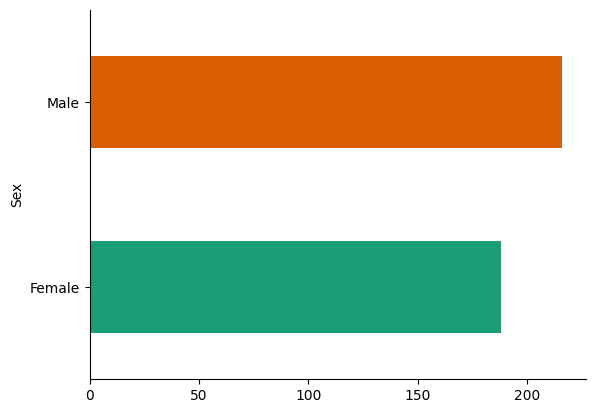

In [ ]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.groupby(shortened_names['Your Sex?']).size() / len(df)

,0
Sex,
Female,0.463054
Male,0.532020


Slight majority of men in the sample

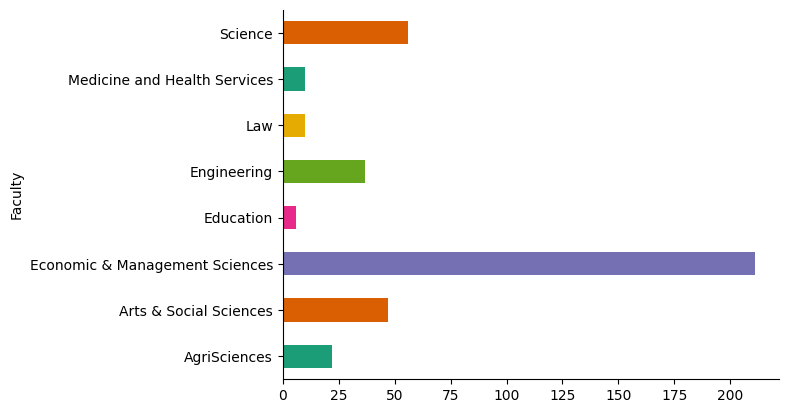

In [ ]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Faculty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

df.groupby(shortened_names['What faculty does your degree fall under?']).size() / len(df)

,0
Faculty,
AgriSciences,0.054187
Arts & Social Sciences,0.115764
Economic & Management Sciences,0.519704
Education,0.014778
Engineering,0.091133
Law,0.024631
Medicine and Health Services,0.024631
Science,0.137931


Approximately 52% of the population belongs to the Faculty of Economic and Management Sciences.

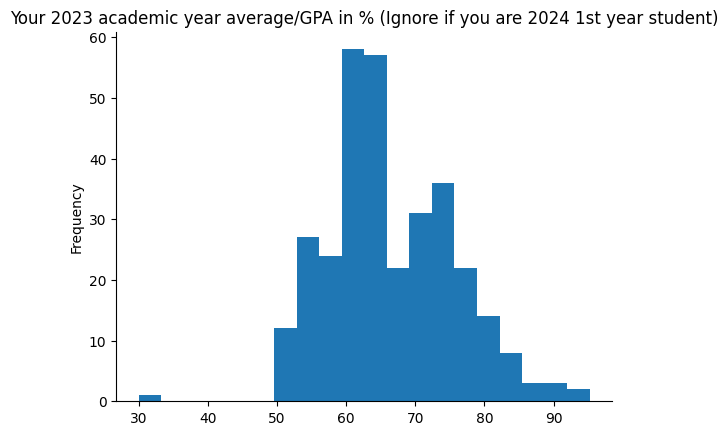

In [ ]:
# @title Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)

from matplotlib import pyplot as plt
df[shortened_names['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']].plot(kind='hist', bins=20, title='Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)')
plt.gca().spines[['top', 'right',]].set_visible(False)

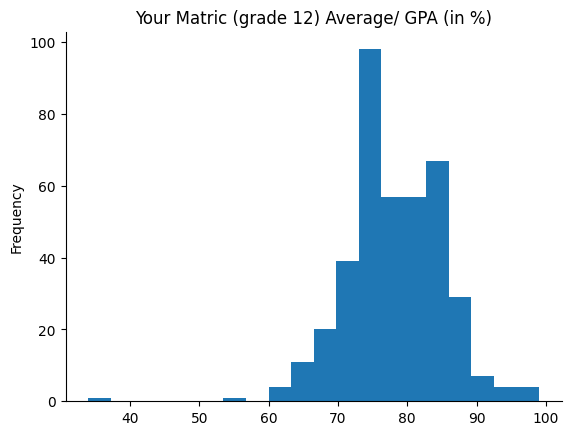

In [ ]:
# @title Your Matric (grade 12) Average/ GPA (in %)

from matplotlib import pyplot as plt
df[shortened_names['Your Matric (grade 12) Average/ GPA (in %)']].plot(kind='hist', bins=20, title='Your Matric (grade 12) Average/ GPA (in %)')
plt.gca().spines[['top', 'right',]].set_visible(False)

The histograms of the academic averages suggest a normal distribution for these variables.

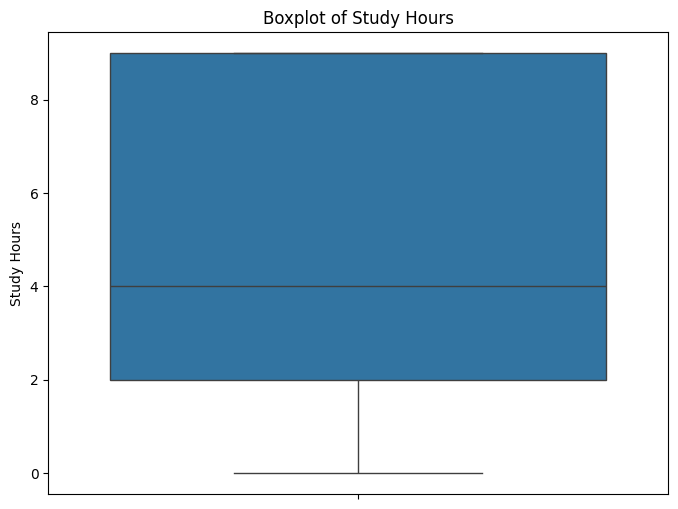

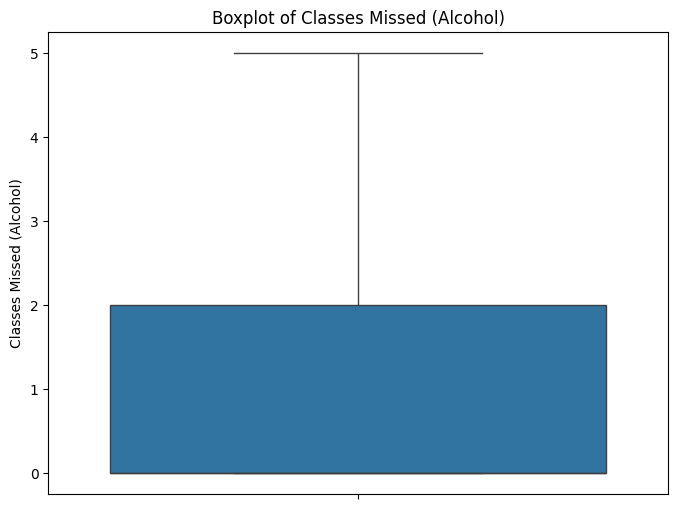

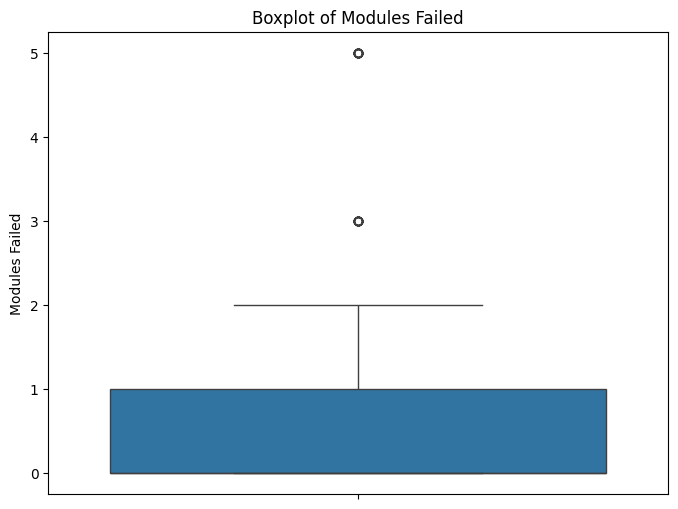

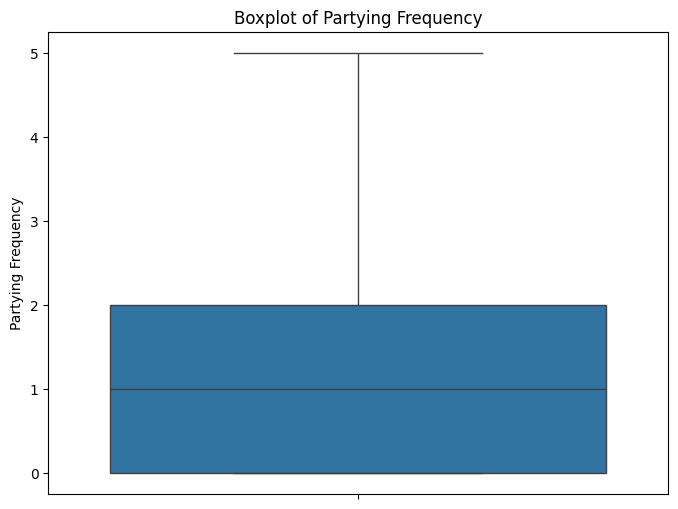

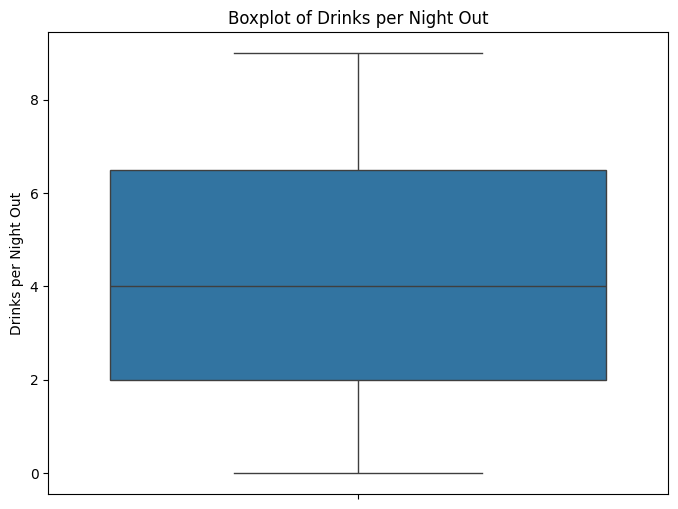

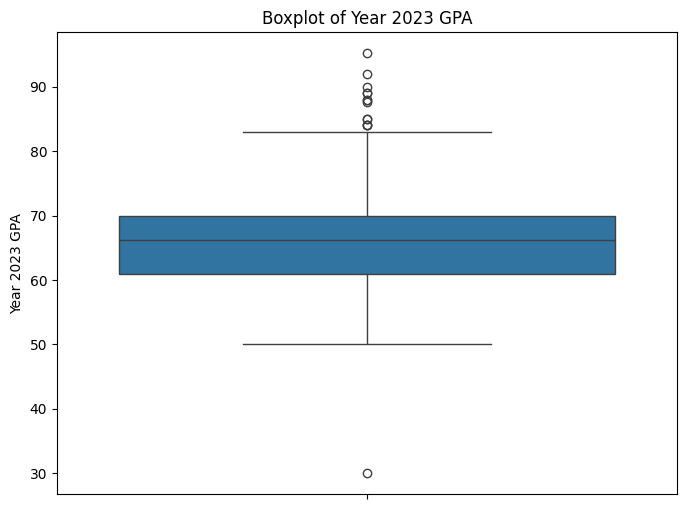

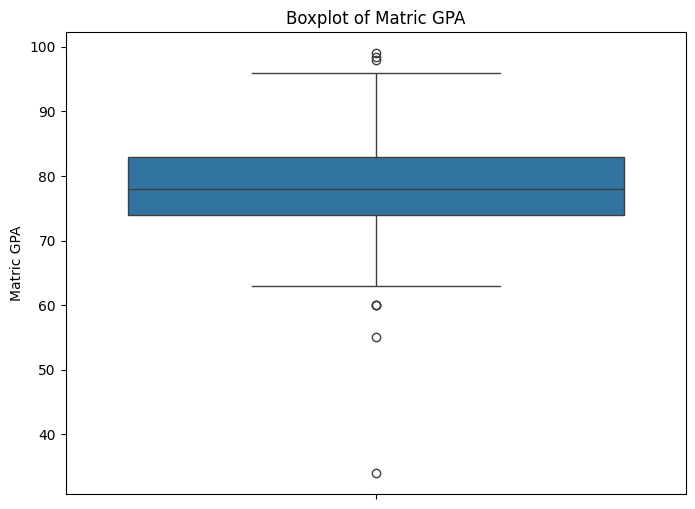

In [ ]:
# Create boxplots for each numerical column
for col in df_cuantitative.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_cuantitative[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

There is not enough evidence of outliers to remove data.

# Bivariate analysis

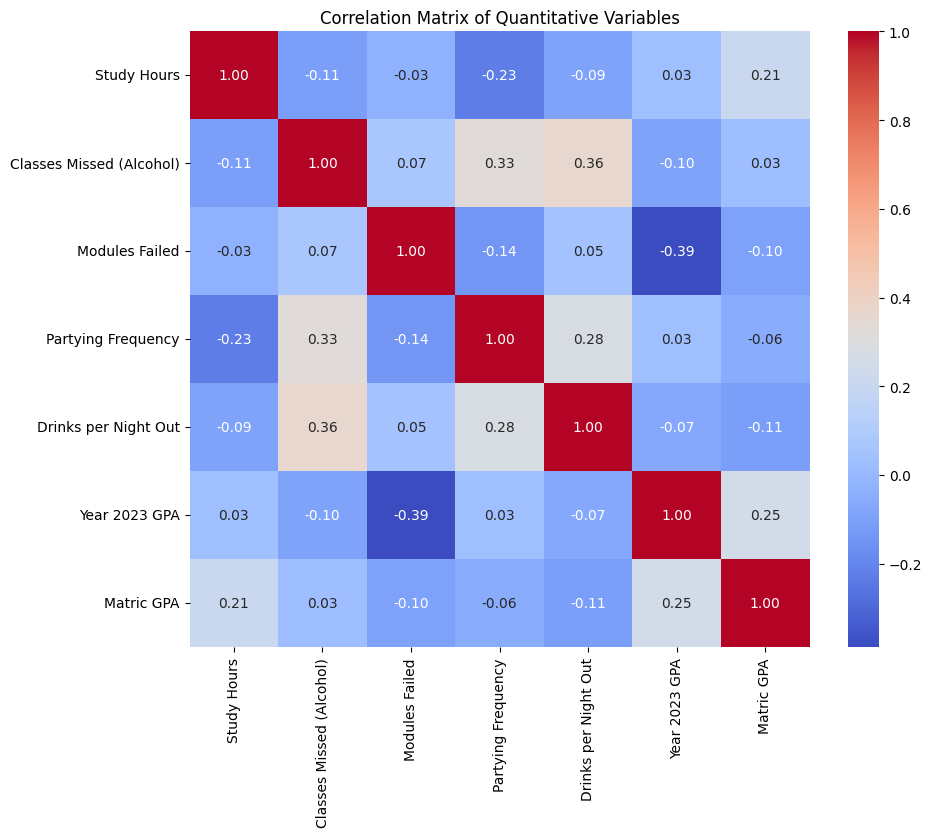

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_cuantitative.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Quantitative Variables')
plt.show()

Given the heatmap, it is worth highlighting the negative correlations between the general and 2023 academic averages with respect to the others. Considering that the graph uses Pearson correlation (which measures linear correlation), it is possible to evaluate the behavior of a linear regression model with the average for the year 2023 as the target variable.

# Linear Model Construction

## Normalization

In [ ]:
df_cuantitative.isna().sum()

,0
Study Hours,0
Classes Missed (Alcohol),0
Modules Failed,0
Partying Frequency,0
Drinks per Night Out,0
Year 2023 GPA,0
Matric GPA,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_cuantitative), columns=df_cuantitative.columns)

df_std.head()

,Study Hours,Classes Missed (Alcohol),Modules Failed,Partying Frequency,Drinks per Night Out,Year 2023 GPA,Matric GPA
0,1.293936,1.414226,-0.570351,-1.116677,1.414298,0.706833,-0.285109
1,1.293936,2.831945,-0.570351,-1.116677,-0.372832,1.076803,1.577668
2,-0.453114,1.414226,-0.570351,0.474098,1.414298,-1.389667,-0.285109
3,-0.453114,0.705367,-0.570351,1.269486,1.414298,2.186715,1.577668
4,-0.453114,-0.003492,1.554075,-1.116677,0.520733,-1.759638,-0.571690


## train-test-split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 1. División entrenamiento / prueba
X = df_std.drop(columns=['Year 2023 GPA'])
y = df_std['Year 2023 GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Crear modelo lineal
model = LinearRegression()

In [ ]:
# 3. Entrenar
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 4. Predicciones
y_pred = model.predict(X_test)

# Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 5. Evaluación
print("Coeficiente (pendiente):", model.coef_)
print("Intercepto:", model.intercept_)
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Coeficiente (pendiente): [-0.09883602 -0.11136063 -0.33715816  0.03961542  0.01434676  0.23065638]
Intercepto: 0.011919928028335369
R^2: 0.17115572920957178
MSE: 0.9643814628722139


In [ ]:
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

coef_df

,Variable,Coeficiente
5,Matric GPA,0.230656
3,Partying Frequency,0.039615
4,Drinks per Night Out,0.014347
0,Study Hours,-0.098836
1,Classes Missed (Alcohol),-0.111361
2,Modules Failed,-0.337158


In [ ]:
dummies = pd.get_dummies(df_cualitative)
dummies.head()

,Sex_Female,Sex_Male,Year 2023_1st Year,Year 2023_2nd Year,Year 2023_3rd Year,Year 2023_4th Year,Year 2023_Postgraduate,Faculty_AgriSciences,Faculty_Arts & Social Sciences,Faculty_Economic & Management Sciences,...,Scholarship 2023_No,"Scholarship 2023_Yes (NSFAS, etc...)",In Relationship_No,In Relationship_Yes,Parents Approve Alcohol_No,Parents Approve Alcohol_Yes,Parent Relationship Strength_Close,Parent Relationship Strength_Distant,Parent Relationship Strength_Fair,Parent Relationship Strength_Very close
0,True,False,False,True,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,False,True,False,True,False,False,False,False,False,True,...,False,True,True,False,False,True,False,False,False,True
2,False,True,True,False,False,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
3,False,True,False,True,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,True
4,True,False,False,True,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,True,False


In [ ]:
df_model = pd.concat([df_std, dummies], axis=1)
df_model.head()

,Study Hours,Classes Missed (Alcohol),Modules Failed,Partying Frequency,Drinks per Night Out,Year 2023 GPA,Matric GPA,Sex_Female,Sex_Male,Year 2023_1st Year,...,Scholarship 2023_No,"Scholarship 2023_Yes (NSFAS, etc...)",In Relationship_No,In Relationship_Yes,Parents Approve Alcohol_No,Parents Approve Alcohol_Yes,Parent Relationship Strength_Close,Parent Relationship Strength_Distant,Parent Relationship Strength_Fair,Parent Relationship Strength_Very close
0,1.293936,1.414226,-0.570351,-1.116677,1.414298,0.706833,-0.285109,True,False,False,...,True,False,False,True,False,True,False,False,False,True
1,1.293936,2.831945,-0.570351,-1.116677,-0.372832,1.076803,1.577668,False,True,False,...,False,True,True,False,False,True,False,False,False,True
2,-0.453114,1.414226,-0.570351,0.474098,1.414298,-1.389667,-0.285109,False,True,True,...,True,False,True,False,False,True,False,False,False,True
3,-0.453114,0.705367,-0.570351,1.269486,1.414298,2.186715,1.577668,False,True,False,...,True,False,False,True,False,True,False,False,False,True
4,-0.453114,-0.003492,1.554075,-1.116677,0.520733,-1.759638,-0.571690,True,False,False,...,True,False,True,False,False,True,False,False,True,False


In [ ]:
# 1. División entrenamiento / prueba
X2 = df_model.drop(columns=['Year 2023 GPA'])
y2 = df_model['Year 2023 GPA']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 2. Crear modelo lineal
model2 = LinearRegression()

# 3. Entrenar
model2.fit(X2_train, y2_train)

# 4. Predicciones
y2_pred = model2.predict(X2_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 5. Evaluación
print("Coeficiente (pendiente):", model2.coef_)
print("Intercepto:", model2.intercept_)
print("R^2:", r2_score(y2_test, y2_pred))
print("MSE:", mean_squared_error(y2_test, y_pred))

Coeficiente (pendiente): [-1.23145469e-01 -9.40855491e-02 -4.10888362e-01 -2.19884134e-02
  3.21568392e-02  2.16884871e-01 -8.26832420e-01 -1.00368051e+00
  2.09043063e-01  2.77601492e-01  1.87068847e-01  6.08620743e-01
  6.53858302e-01  6.40268419e-01  6.23733788e-01  8.24494354e-01
  9.99983821e-01  4.38467386e-01  5.91330990e-01  6.96612970e-01
  8.50211806e-01  1.16446373e-01  1.70087694e-01  7.74292200e-04
  1.40464227e-02  3.01601496e-01  2.33841646e-01  2.81158827e-01
  5.44636604e-02  1.69643979e-01  2.09281184e-01  2.64210928e-01
 -1.27935792e+00 -1.11193132e+00  8.18734529e-01  4.50609538e+00
  9.63249440e-01  9.52158160e-01]
Intercepto: -0.3522469105994201
R^2: 0.1877542768474405
MSE: 0.9643814628722139


In [ ]:
coef_df = pd.DataFrame({
    "Variable": X2_train.columns,
    "Coeficiente": model2.coef_
}).sort_values(by="Coeficiente", ascending=False)
coef_df

,Variable,Coeficiente
35,Parent Relationship Strength_Distant,4.506095
16,Faculty_Education,0.999984
36,Parent Relationship Strength_Fair,0.963249
37,Parent Relationship Strength_Very close,0.952158
20,Faculty_Science,0.850212
15,Faculty_Economic & Management Sciences,0.824494
34,Parent Relationship Strength_Close,0.818735
19,Faculty_Medicine and Health Services,0.696613
12,Year 2023_Postgraduate,0.653858
13,Faculty_AgriSciences,0.640268


# Robust Methods

In [ ]:
from sklearn.linear_model import RANSACRegressor

# 1. Crear modelo RANSAC
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # default is 100
                         min_samples=0.95, # percentage of data
                         residual_threshold=0.5, # default is None
                         random_state=42)

# 2. Entrenar el modelo
ransac.fit(X2_train, y2_train)

# 3. Predicciones
y2_pred_ransac = ransac.predict(X2_test)

# 4. Evaluación
print("R^2 (RANSAC):", r2_score(y2_test, y2_pred_ransac))
print("MSE (RANSAC):", mean_squared_error(y2_test, y2_pred_ransac))

# Coeficientes del modelo inlier
print("Coeficiente (pendiente RANSAC):", ransac.estimator_.coef_)
print("Intercepto (RANSAC):", ransac.estimator_.intercept_)

# Mostrar variables y coeficientes
coef_df_ransac = pd.DataFrame({
    "Variable": X2_train.columns,
    "Coeficiente": ransac.estimator_.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("\nCoeficientes RANSAC:")
display(coef_df_ransac)

R^2 (RANSAC): 0.17816867969903438
MSE (RANSAC): 0.9562217159928289
Coeficiente (pendiente RANSAC): [-0.09029307 -0.03603184 -0.47257447 -0.01992529 -0.01176989  0.16205533
 -0.30355783 -0.39783602  0.1856791   0.38569632  0.29813901  0.93469524
  1.05641711  0.10584022  0.24592991  0.33705174  0.7092625   0.01107291
  0.05227962  0.26739997  0.38522478 -0.09553434 -0.08554289 -0.04349758
 -0.03554524  0.1584187   0.21606323  0.24876463  0.20210214  0.32613108
  0.10704576  0.22327758 -1.13419711 -1.01408886  0.74370173  4.86892332
  1.02011493  0.86709348]
Intercepto (RANSAC): -0.3469035527161812

Coeficientes RANSAC:


,Variable,Coeficiente
35,Parent Relationship Strength_Distant,4.868923
12,Year 2023_Postgraduate,1.056417
36,Parent Relationship Strength_Fair,1.020115
11,Year 2023_4th Year,0.934695
37,Parent Relationship Strength_Very close,0.867093
34,Parent Relationship Strength_Close,0.743702
16,Faculty_Education,0.709263
9,Year 2023_2nd Year,0.385696
20,Faculty_Science,0.385225
15,Faculty_Economic & Management Sciences,0.337052


# Conclusions

The linear models only represent around 15% of the variability. Although new information was attempted to be added with the dummies of the categorical variables, the metrics worsened. It is concluded that the research should continue based on models with non-linear relationships such as decision trees. However, it is worth noting that the model coefficients are weakly associated with the initial hypothesis, which promotes the continuity of the study. For example, the variables with the highest weight in the model: cumulative GPA (positively) and modules failed (negatively) are associated with the annual GPA as estimated.

In [ ]:
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)
coef_df

,Variable,Coeficiente
5,Matric GPA,0.230656
3,Partying Frequency,0.039615
4,Drinks per Night Out,0.014347
0,Study Hours,-0.098836
1,Classes Missed (Alcohol),-0.111361
2,Modules Failed,-0.337158
